# Машинное обучение, DS-поток
## Задание ML.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 30 баллов;
* Задача 2 &mdash; 70 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 60 баллов.

In [ ]:
# Bot check

# HW_ID: ds_ml4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

---
### Задача 1

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$;
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите подробное bias-variance разложение со всеми тремя компонентами: смещение, разброс, шум. Компоненту, отвечающую за разброс, разрешается не доводить до конца. Если в выражении присутствует дисперсия $\varepsilon_i$, то так и пишите: $\mathsf{D}\varepsilon_i$.

Запишем показатель качества (далее под $\mathsf{E}_X$ подразумеваем условное мат. ожидание по тренировочной выборке, под $\mathsf{E}_x$ - по тестовой):

$$
Q=\mathsf{E}_x\mathsf{E}_{X,\varepsilon}\left[x^2+\varepsilon-\hat{\theta}x\right]^2
$$

Распишем внутреннее математическое ожидание:

$$
\mathsf{E}_{X,\varepsilon}\left[x^2+\varepsilon-\hat{\theta}x\right]^2=\mathsf{E}_{X,\varepsilon}\left[(x^2-\hat{\theta}x)^2-2\varepsilon(x^2-\hat{\theta}x)+\varepsilon^2\right]=\mathsf{E}_{X}[x^2-\hat{\theta}x]^2+\mathsf{D}\varepsilon
$$

Выделили компоненту, отвечающую за неустранимый шум. Продолжим преобразования:

$$
\mathsf{E}_{X}[x^2-\hat{\theta}x]^2=\mathsf{E}_X\left[x^2-\mathsf{E}_X\hat{\theta}x+\mathsf{E}_X\hat{\theta}x-\hat{\theta}x\right]^2=
$$

$$
=\mathsf{E}_X [x^2-\mathsf{E}_X\hat{\theta}x]^2+\mathsf{E}_X [\mathsf{E}_X\hat{\theta}x-\hat{\theta}x]^2+2\mathsf{E}_X [x^2-\mathsf{E}_X\hat{\theta}x]\cdot \mathsf{E}_X [\mathsf{E}_X\hat{\theta}x-\hat{\theta}x]=
$$

$$
=(x^2-x\mathsf{E}_X\hat{\theta})^2+x^2\mathsf{D}_X[\hat{\theta}]=x^2((x-\mathsf{E}_X\hat{\theta})^2+\mathsf{D}\hat{\theta})
$$

Находим внешнее мат. ожидание:

$$
Q=\mathsf{E}_x \left[x^2(x-\mathsf{E}_X\hat{\theta})^2+x^2\mathsf{D}_X\hat{\theta}+\mathsf{D}\varepsilon\right]=\mathsf{E}_x \left[x^2(x-\mathsf{E}_X\hat{\theta})^2\right]+\mathsf{D}\hat{\theta}\mathsf{E}_x[x^2]+\mathsf{D}\varepsilon=\mathsf{E}_x \left[x^2(x-\mathsf{E}_X\hat{\theta})^2\right]+\sigma^2\mathsf{D}\hat{\theta}+\mathsf{D}\varepsilon
$$

В итоге имеем:

- bias: $\mathsf{E}_x\left[x^2(x-\mathsf{E}\hat{\theta})^2\right]$
- variance: $\sigma^2\mathsf{D}\hat{\theta}$
- noise: $\mathsf{D}\varepsilon$

---
### Задача 2

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` &mdash; целочисленные признаки. Остальные признаки &mdash; вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [78]:
TEST = False

In [79]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target

if TEST:
    X, y = X[:100], y[:100]

Разбейте данные на train и test, выделив на test 25% данных.

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

Попробуйте получить зависимость от количества деревьев, обучив лишь **один случайный лес**. В этом вам поможет аттрибут `_estimators` у обученной модели. Последовательно вызывайте predict у каждого дерева и усредняйте полученные результаты.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100)

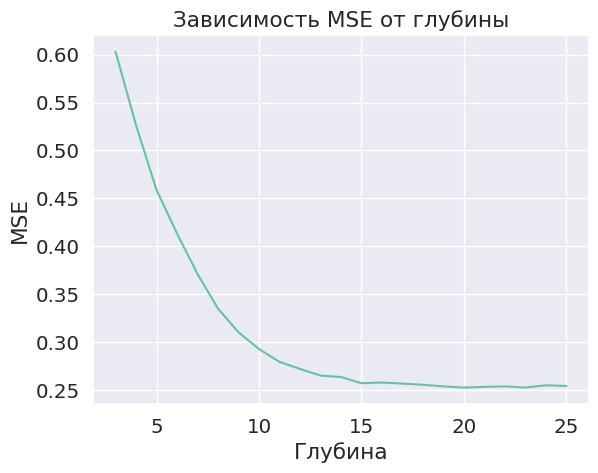

In [24]:
mse_depth = []

# проверяем глубину
for depth in np.arange(3, 26):
    model.set_params(max_depth=depth)
    model.fit(X_train, y_train)
    mse_depth.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(np.arange(3, 26), mse_depth)
plt.xlabel('Глубина')
plt.ylabel('MSE')
plt.title('Зависимость MSE от глубины')
plt.show()

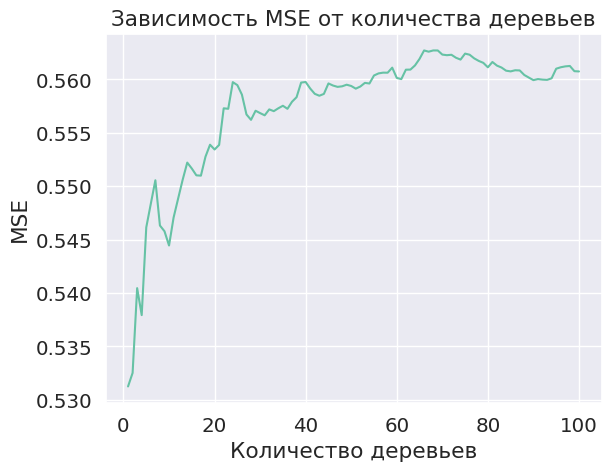

In [25]:
mse_num_trees = []

model.set_params(max_depth=None)
model.fit(X_train, y_train)

sum_res = 0
for n in np.arange(1, 101):
    sum_res += mean_squared_error(y_test, model.estimators_[n - 1].predict(X_test))
    mse_num_trees.append(sum_res / n)

plt.plot(np.arange(1, 101), mse_num_trees)
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества деревьев')
plt.show()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:**

1. Чем больше глубина дерева, тем меньше ошибка. Это ожидаемо: чем глубже дерево, тем точнее оно может аппроксимировать исходную функцию. В то же время чем больше деревьев при глубине по умолчанию (небольшом), тем ошибка больше. Это, вероятно, связано с тем, что при небольшой глубине деревья часто ошибаются, и при выборе большого количества таких деревьев ошибающиеся начинают доминировать.
2. При достаточно большом значении параметров качество предсказаний практически не меняется - что связано с тем, что среди большого количества деревьев ещё одно не сможет сильно изменить среднее значение.
3. Да, справедливо, потому что хотя дисперсия и уменьшается в примерно $n^2$ раз, это не мешает ей стремиться к дисперсии шума - что и означает переобучение.

Обучите случайный лес с параметрами по умолчанию и выведите MSE на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются? Какие источники случайности есть при построении случайного леса и какие из них реализуются в данном случае?

In [27]:
model = RandomForestRegressor()
for _ in range(3):
    model.fit(X_train, y_train)
    print('%.5f' % mean_squared_error(y_test, model.predict(X_test)))

0.25315
0.25295
0.25487


**Ответ:** Выбор подвыборок для каждого дерева - как следствие, разные признаки и пороги в каждой вершине, разная глубина. В данном случае реализуются все источники.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [75]:
from sklearn.model_selection import GridSearchCV


forest_gridsearch = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': np.arange(1, 101),
        'max_depth': np.arange(3, 26)
    },
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
).fit(X_train, y_train)

Выведите найденные оптимальные параметры.

In [76]:
print('max_depth: %d' % forest_gridsearch.best_params_['max_depth'])
print('n_estimators: %d' % forest_gridsearch.best_params_['n_estimators'])

max_depth: 25
n_estimators: 12


Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [77]:
max_depth = 25
n_estimators = 12

Оценим качество предсказаний обученного решающего леса.

In [81]:
forest = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators).fit(X_train, y_train)
print(mean_squared_error(y_test, forest.predict(X_test)))

0.2761123046796768


Исследуйте зависимость метрики MSE от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [83]:
mse_features_train = []
mse_features_test = []

for n_features in np.arange(1, 9):
    forest.set_params(max_features=n_features)
    forest.fit(X_train, y_train)
    mse_features_test.append(mean_squared_error(y_test, forest.predict(X_test)))
    mse_features_train.append(mean_squared_error(y_train, forest.predict(X_train)))

Постройте график зависимости метрики MSE на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

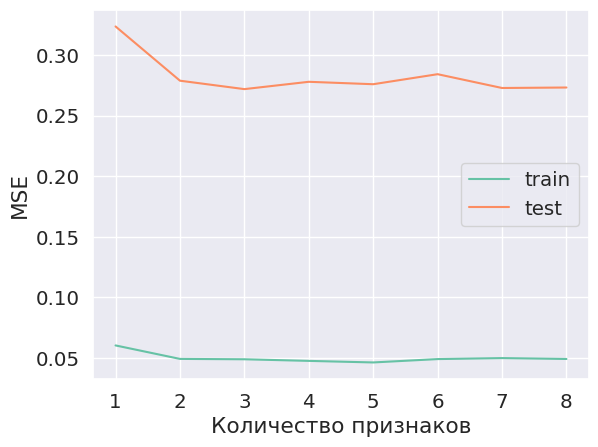

In [85]:
plt.plot(np.arange(1, 9), mse_features_train, label='train')
plt.plot(np.arange(1, 9), mse_features_test, label='test')
plt.xlabel('Количество признаков')
plt.ylabel('MSE')
plt.legend()
plt.show()

Почему график получился таким? Как зависит разнообразие деревьев, инными словами их скоррелированность, от величины `n_features`?

**Ответ:** Ограничивая количество используемых признаков небольшим числом, мы получим довольно однообразные деревья, причём, весьма вероятно, с предсказаниями, далёкими от истины - так как они будут ограничены в рассматриваемых признаках.

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики MSE на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

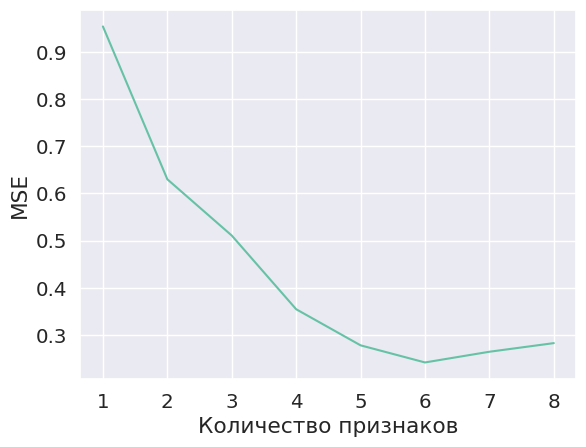

In [131]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=12
)

mse_features_bag = []

for n_features in np.arange(1, 9):
    model.set_params(max_features=n_features)
    model.fit(X_train, y_train)
    mse_features_bag.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(np.arange(1, 9), mse_features_bag)
plt.xlabel('Количество признаков')
plt.ylabel('MSE')
plt.show()

Сравните результаты обычного случайного леса с только что построенным лесом.

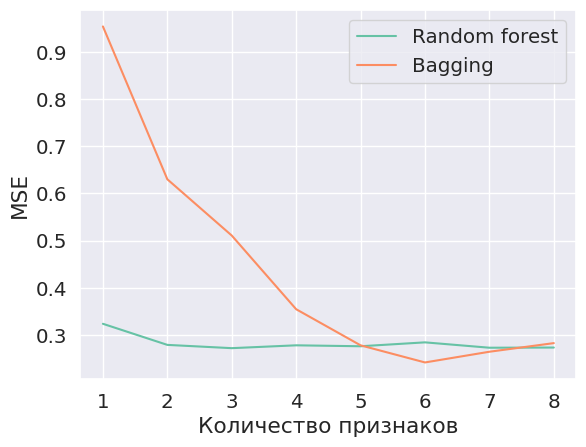

In [132]:
plt.plot(np.arange(1, 9), mse_features_test, label='Random forest')
plt.plot(np.arange(1, 9), mse_features_bag, label='Bagging')
plt.xlabel('Количество признаков')
plt.ylabel('MSE')
plt.legend()
plt.show()

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу? Опирайтесь в своих рассуждениях на bias-variance разложение.

**Вывод.**

Когда мы выбираем случайное подмножество в каждой вершине, мы получаем более вариативные деревья, что позволяет уменьшить как bias (за счёт того, что при большом количестве разнообразных деревьев среднее окажется ближе к истине), так и variance (за счёт усреднения) компоненту разложения.

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

Первая конструкция фиксирует некоторые $n$ признаков для всего дереваб вторая - ограничивает число признаков $n$, рассматриваемых в конкретной вершине (но общее число используемых признаков может быть больше $n$)

---
### Задача 3

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели. Для оценки корреляций используйте [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) или [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним.

In [186]:
from sklearn.linear_model import Ridge

model1 = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=25),
    n_estimators=12,
    random_state=42,
    n_jobs=-1
).fit(X_train, y_train)

model2 = BaggingRegressor(
    estimator=Ridge(),
    n_estimators=12,
    random_state=42,
    n_jobs=-1
).fit(X_train, y_train)

In [151]:
est = []
for estimator in model1.estimators_:
    est.append(estimator.predict(X_test))

corr_matrix = [[]] * 12

for i, x in enumerate(est):
    corr_matrix[i] = [0] * 12
    for j, y in enumerate(est):
        corr_matrix[i][j] = sps.pearsonr(x, y).statistic

<Axes: >

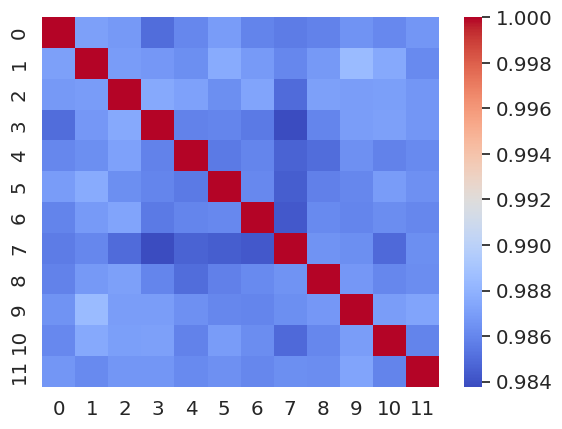

In [152]:
corr_matrix = np.array(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm')

У всех моделей корреляция оказалась больше 0.99, что обессмысливает беггинг.

In [153]:
est = []
for estimator in model2.estimators_:
    est.append(estimator.predict(X_test))

corr_matrix = [[]] * 12

for i, x in enumerate(est):
    corr_matrix[i] = [0] * 12
    for j, y in enumerate(est):
        corr_matrix[i][j] = sps.pearsonr(x, y).statistic

<Axes: >

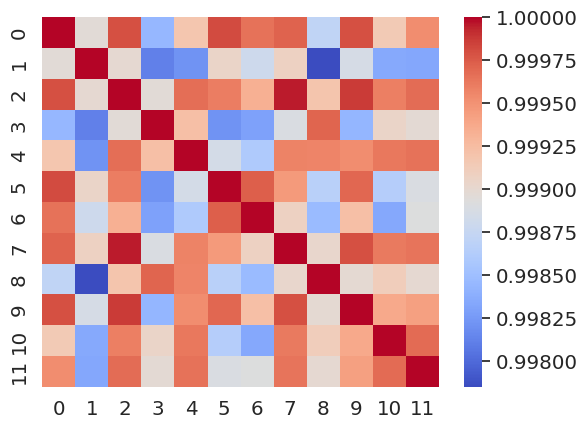

In [154]:
corr_matrix = np.array(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm')

Теперь сравним variance для каждого случая.

In [188]:
rng = np.random.default_rng()

def draw_predictions(
    model,
    x_train,
    y_train,
    x_test,
    y_test,
    n_iter=50, 
    label="",
    log=True,
    show=True,
    sample_size=500,
    color='blue',
    new_figure=True,
    title=None
):
    """
    Функция применяет модель n_iter раз к данным и рисует kde предсказаний на фиксированном объекте.
    * model - модель
    * x - обучающая выборка
    * y - таргет обучающей выборки
    * label - label кривой на графике
    * n_iter - количество применений
    * log - логирование модели, дисперсии, смещения, MSE в stdout
    * show - будет ли вызван plt.show
    * title - title всего графика
    """

    y_pred = []
    example = np.random.choice(np.arange(len(y_test)), 1)[0]

    for i in range(n_iter):
        fitted = model.fit(x_train, y_train)
        y_pred.append(fitted.predict(x_test[example].reshape(1, -1))[0])

    # рисуем графики, выводим статистики
    if new_figure:
        plt.figure(figsize=(12, 5))

    plt.hist(
        y_pred, bins=20, label=f"kde ({label})", alpha=0.35, density=True
    )

    plt.plot([np.mean(y_pred)], [0], marker='^', ms=20, label=f"mean ({label})", color=color)
    plt.title(title, fontsize=12)
    plt.xlabel("Область значений модели")
    plt.ylabel((-0.5, 0.5))
    plt.legend()

    if show:
        plt.plot([y_test[example]], [0], 'ro', marker='*', ms=20, color='red', label="$y(x)$")
        plt.legend(loc='best')
        plt.show()

/tmp/ipykernel_3102142/2094261739.py:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([y_test[example]], [0], 'ro', marker='*', ms=20, color='red', label="$y(x)$")
/tmp/ipykernel_3102142/2094261739.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[example]], [0], 'ro', marker='*', ms=20, color='red', label="$y(x)$")


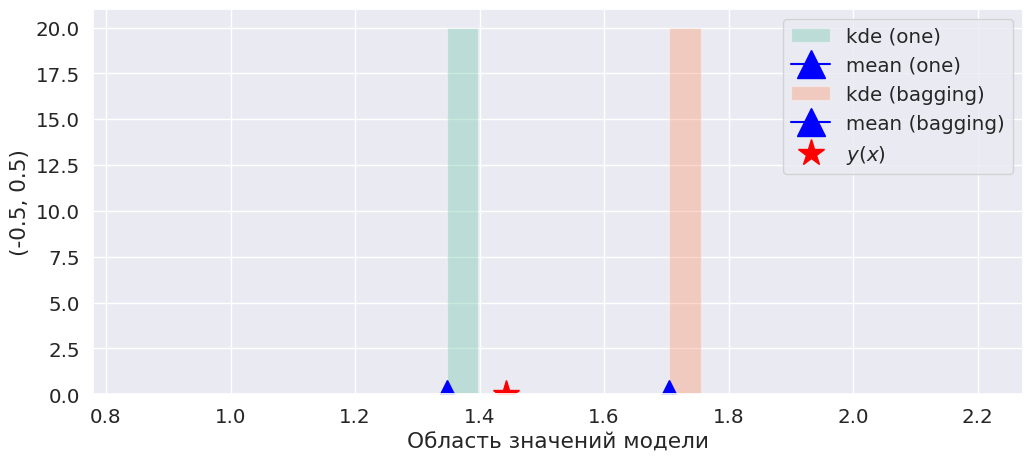

In [189]:
draw_predictions(model1.estimators_[0], X_train, y_train, X_test, y_test, show=False, label='one')
draw_predictions(model1, X_train, y_train, X_test, y_test, new_figure=False, label='bagging')

/tmp/ipykernel_3102142/2094261739.py:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([y_test[example]], [0], 'ro', marker='*', ms=20, color='red', label="$y(x)$")
/tmp/ipykernel_3102142/2094261739.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[example]], [0], 'ro', marker='*', ms=20, color='red', label="$y(x)$")


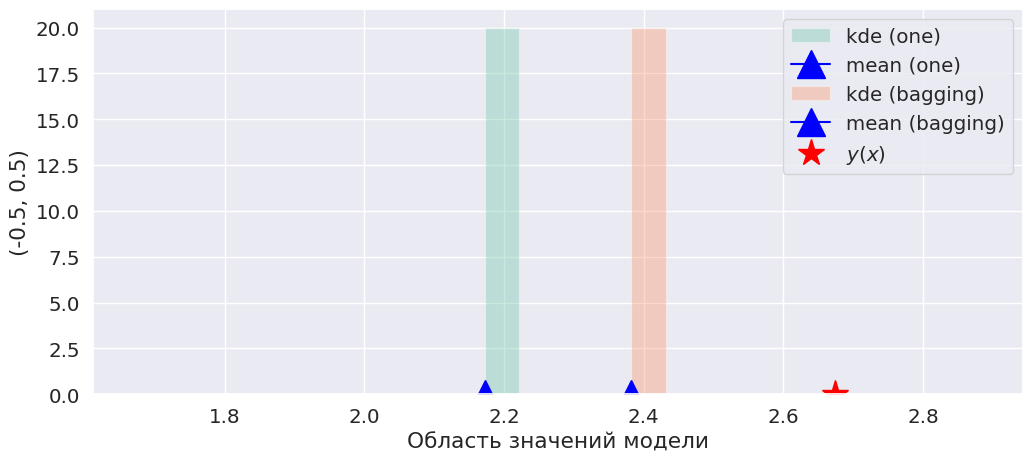

In [190]:
draw_predictions(model2.estimators_[0], X_train, y_train, X_test, y_test, show=False, label='one')
draw_predictions(model2, X_train, y_train, X_test, y_test, new_figure=False, label='bagging')

---
### Задача 4

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: **Grid Search** и **Random Search**. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* **Grid Search** &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* **Random Search** &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [92]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

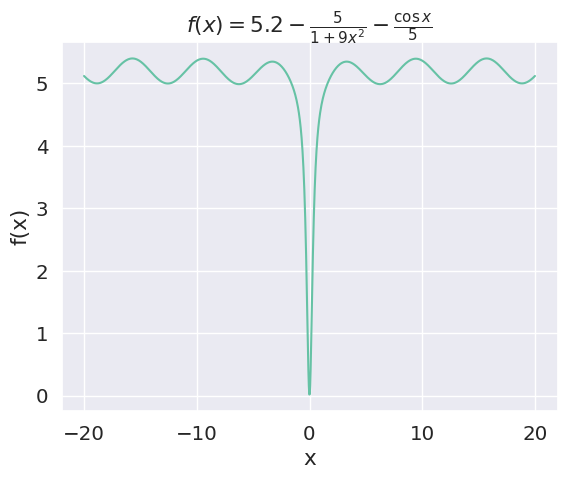

In [68]:
x = np.linspace(-20, 20, 1000)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x)=5.2-\\frac{5}{1+9x^2}-\\frac{\\cos{x}}{5}$')
plt.show()

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

**Ответ:**  "впадина" очень узкая, в ней значение функции изменяется очень быстро, так что при недостаточно малом шаге сетки мы скорее всего не попадём в минимум.

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [89]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [93]:
import scipy.stats as sps
from tqdm import tqdm

# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for _ in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = sps.uniform(loc=-0.5, scale=1.0).rvs(1)[0]
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = np.linspace(-10, 10, n)
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = np.min(f(grid + x_0))
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|██████████| 100/100 [00:02<00:00, 49.88it/s]


Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

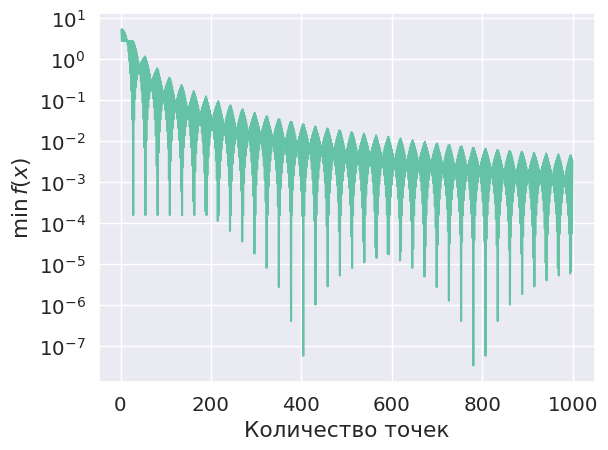

In [106]:
plt.plot(grid_size, grid_f_min)
plt.xlabel('Количество точек')
plt.ylabel('$\\min\\,f(x)$')
plt.yscale('log')
plt.show()

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [97]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 1000)

In [98]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for _ in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = sps.uniform(loc=-0.5, scale=1.0).rvs(1)[0]
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points = sps.uniform(loc=-10, scale=20).rvs(1000)
    
    #цикл по количеству точек
    for n in random_size:
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = np.min(f(points[:n] + x_0))
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

100%|██████████| 100/100 [00:01<00:00, 61.65it/s]


Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

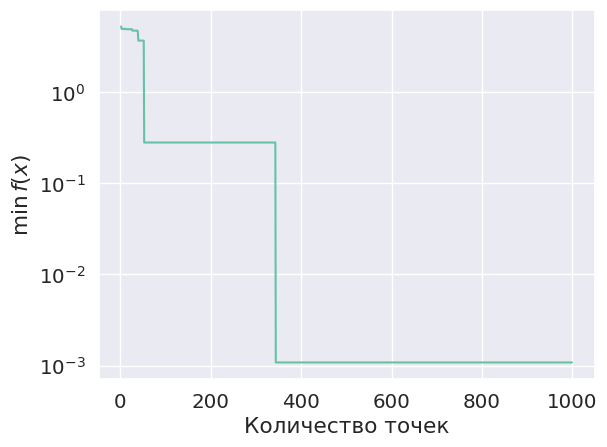

In [99]:
plt.plot(random_size, random_min_f)
plt.xlabel('Количество точек')
plt.ylabel('$\\min\\,f(x)$')
plt.yscale('log')
plt.show()

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

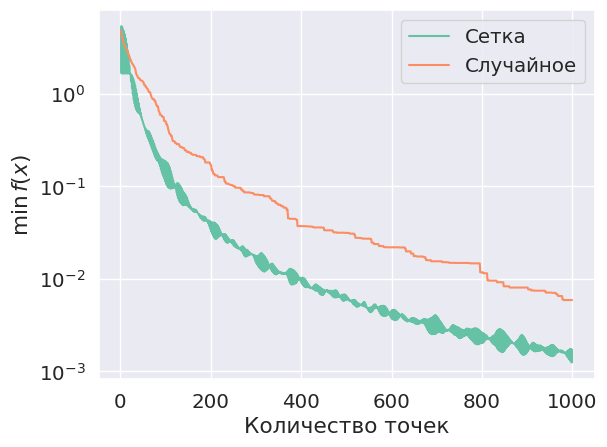

In [103]:
grid_min_f = np.mean(np.array(grid_min_f_trace), axis=0)
random_min_f = np.mean(np.array(random_min_f_trace), axis=0)

plt.plot(grid_size, grid_min_f, label='Сетка')
plt.plot(random_size, random_min_f, label='Случайное')
plt.legend()
plt.xlabel('Количество точек')
plt.ylabel('$\\min\\,f(x)$')
plt.yscale('log')
plt.legend()
plt.show()

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [108]:
def f(x, y,):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

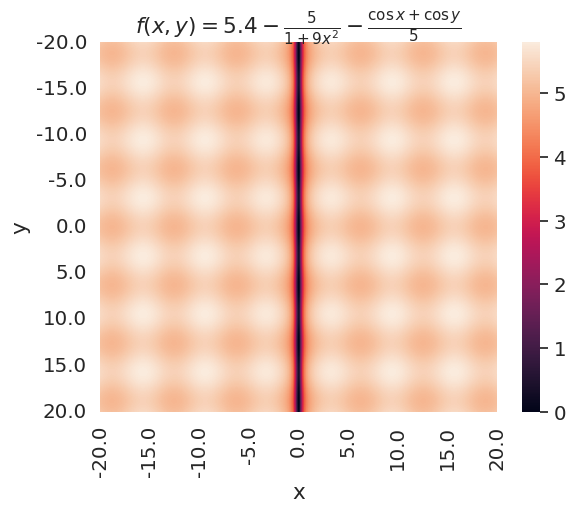

In [70]:
x = np.linspace(-20, 20, 1001)
y = np.copy(x)
xv, yv = np.meshgrid(x, y)
df = pd.DataFrame(f(xv, yv), index=y, columns=x)
ax = sns.heatmap(df, xticklabels=125, yticklabels=125)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('$f(x,y)=5.4-\\frac{5}{1+9x^2}-\\frac{\\cos x+\\cos y}{5}$')
plt.show()

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

In [125]:
grid_size_2d = np.arange(2, 32)
grid_min_f_trace_2d = []

for _ in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    shift = sps.uniform(loc=-0.5, scale=1.0).rvs(2)
    # массив для минимумов для текущего размера сетки
    grid_f_min_2d = []
    # цикл по размеру сетки
    for n in grid_size_2d:
        # сетка на [-10, 10] размера n
        grid_2d_x = np.linspace(-10, 10, n)
        grid_2d_y = np.linspace(-10, 10, n)
        grid_2d_xv, grid_2d_yv = np.meshgrid(grid_2d_x, grid_2d_y)
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = np.min(f(grid_2d_xv + shift[0], grid_2d_yv + shift[1]))
        # сохраним минимум для сетки размера n
        grid_f_min_2d.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace_2d.append(grid_f_min_2d)

100%|██████████| 100/100 [00:00<00:00, 477.49it/s]


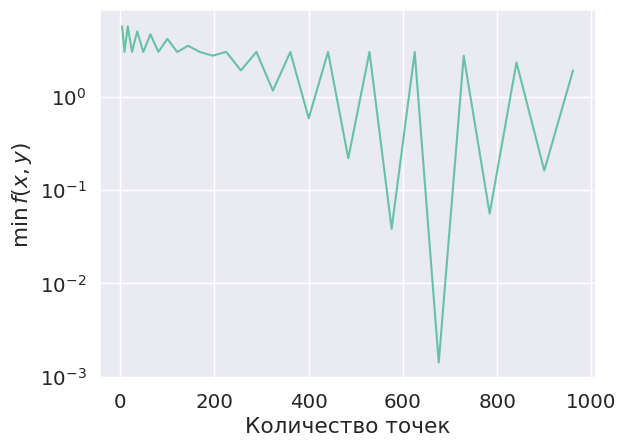

In [126]:
plt.plot(grid_size_2d ** 2, grid_f_min_2d)
plt.xlabel('Количество точек')
plt.ylabel('$\\min\\,f(x,y)$')
plt.yscale('log')
plt.show()

In [122]:
random_size_2d = np.arange(2, 32)
# массив для минимумов для текущего эксперимента
random_min_f_trace_2d = []

# цикл по экспериментам
for _ in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    shift = sps.uniform(loc=-0.5, scale=1.0).rvs(2)
    # массив для минимумов для текущего количества точек
    random_min_f_2d = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points_x = sps.uniform(loc=-10, scale=20).rvs(31)
    points_y = sps.uniform(loc=-10, scale=20).rvs(31)
    
    #цикл по количеству точек
    for n in random_size_2d:
        points_xv, points_yv = np.meshgrid(points_x[:n], points_y[:n])
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = np.min(f(points_xv + shift[0], points_yv + shift[1]))
        # сохранение результатов
        random_min_f_2d.append(f_min)
        
    random_min_f_trace_2d.append(random_min_f_2d)

100%|██████████| 100/100 [00:00<00:00, 382.56it/s]


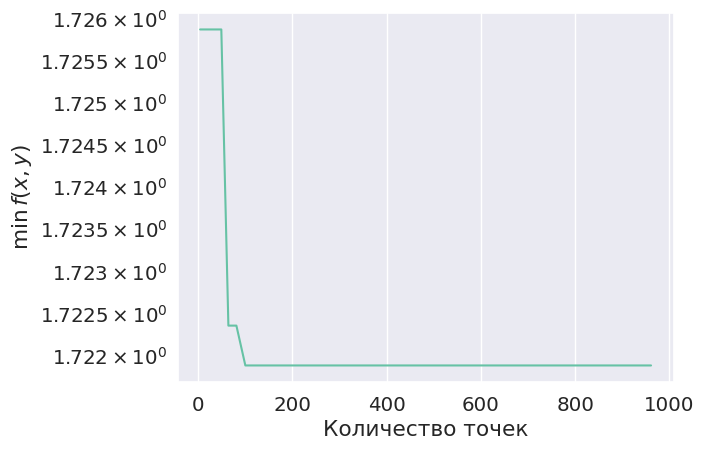

In [123]:
plt.plot(random_size_2d ** 2, random_min_f_2d)
plt.xlabel('Количество точек')
plt.ylabel('$\\min\\,f(x,y)$')
plt.yscale('log')
plt.show()

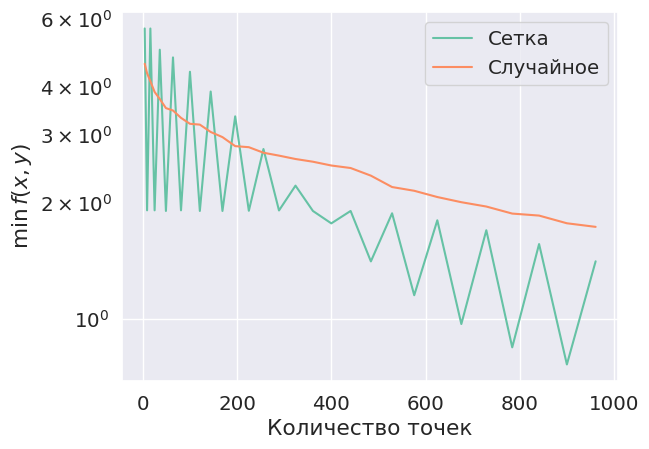

In [128]:
grid_min_f_2d = np.mean(np.array(grid_min_f_trace_2d), axis=0)
random_min_f_2d = np.mean(np.array(random_min_f_trace_2d), axis=0)

plt.plot(grid_size_2d ** 2, grid_min_f_2d, label='Сетка')
plt.plot(random_size_2d ** 2, random_min_f_2d, label='Случайное')
plt.legend()
plt.xlabel('Количество точек')
plt.ylabel('$\\min\\,f(x,y)$')
plt.yscale('log')
plt.legend()
plt.show()

**Вывод:** качество поиска по сетке по мере увеличения количества точек "скачет" от хорошего к плохому. Особенно заметно это в двумерном случае. Качество случайного поиска с ростом количества точек стабильно возрастает. В целом для этой задачи из-за узких минимумов нужно существенно большее количество точек.